In [38]:
import pickle
import keras
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation,Conv2D,MaxPooling2D
from keras.optimizers import SGD
%matplotlib inline

In [39]:
f = open('Assignment3/trainX.pickle','rb')
X = pickle.load(f)
f = open('Assignment3/trainY.pickle','rb')
y = pickle.load(f)

In [40]:
print('X shape : {}'.format(X.shape))
print('y shape : {}'.format(y.shape))
# print('X_test shape : {}'.format(x_test.shape))

X shape : (60000, 28, 28)
y shape : (60000,)


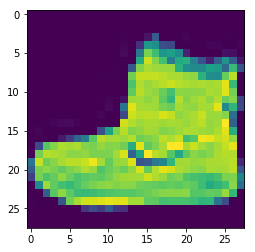

In [41]:
plt.imshow(X[0].reshape(28,28))

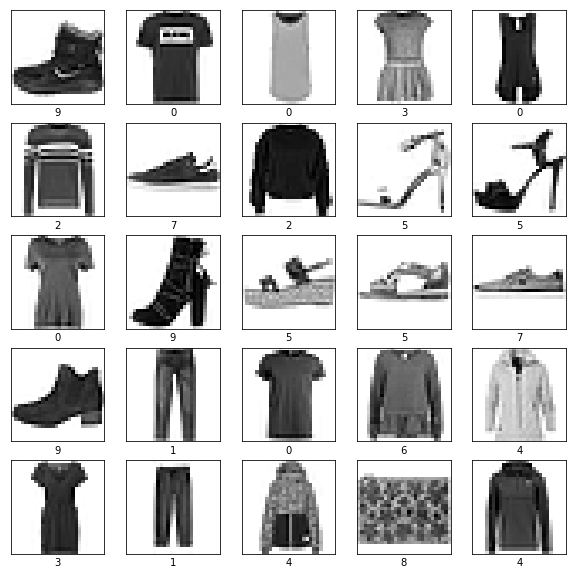

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

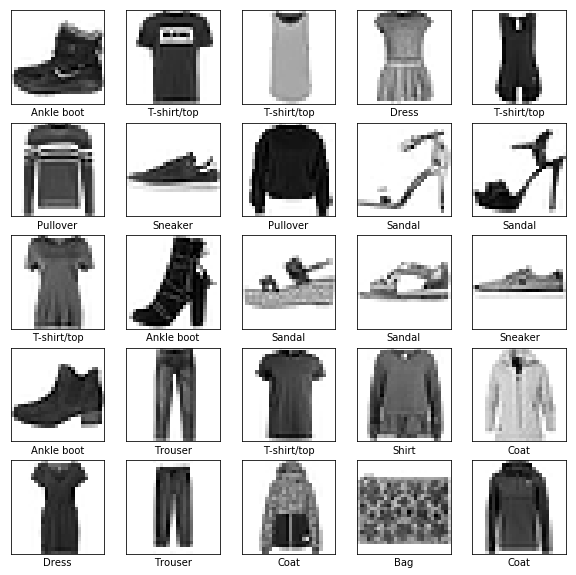

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y[i]])
plt.show()

In [45]:
num_classes = 10
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y,test_size=(1/3),random_state=1)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)


# reshape dataset to have a single channel
# trainX = trainX.reshape((trainX.shape[0],1, 28, 28, 1))
# testX = testX.reshape((testX.shape[0],1, 28, 28, 1))
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY,num_classes)
testY = to_categorical(testY,num_classes)

(40000, 28, 28)
(40000,)
(20000, 28, 28)
(20000,)


In [46]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255
testX /= 255

print('trainX shape: ',trainX.shape)
print('testX shape: ',testX.shape)
print(trainX.shape[0],'train samples')
print(testX.shape[0],'test samples')


trainX shape:  (40000, 28, 28, 1)
testX shape:  (20000, 28, 28, 1)
40000 train samples
20000 test samples


In [47]:

# trainX = np.reshape(trainX,(40000,784))
# testX = np.reshape(testX,(20000,784))

trainX = np.reshape(trainX,(40000,28,28,1))
testX = np.reshape(testX,(20000,28,28,1))

print('trainX shape: ',trainX.shape)
print('testX shape: ',testX.shape)

trainX shape:  (40000, 28, 28, 1)
testX shape:  (20000, 28, 28, 1)


In [12]:
# batch_size = 128
# num_classes = 10
# epochs = 10

# model = Sequential()
# model.add(Dense(500,input_dim=784))
# model.add(Activation('relu'))
# model.add(Dense(300))
# model.add(Activation('relu'))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('softmax'))
# model.summary()
# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# model.fit(trainX,trainY,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(testX,testY))

# score = model.evaluate(testX,testY,verbose=0)
# print('Test loss : ',score[0])
# print('Test accuracy : ',score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_6 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               38528     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
__________

## Accuracy : 88.93%

# CNN Model

In [48]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# k-fold cross-validation
def evaluate_cnn_model(model, dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # iterate on splits
    for train_ix, test_ix in kfold.split(dataX):
        
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
        # evaluate model
        score = model.evaluate(testX, testY, verbose=0)
        print(score[1] * 100)
        # stores scores
        scores.append(score[1])
    return model, scores

In [50]:
model, scores = evaluate_cnn_model(model, trainX, trainY)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 27s 831us/step - loss: 0.5001 - acc: 0.8210 - val_loss: 0.3770 - val_acc: 0.8666
Epoch 2/10
32000/32000 [==============================] - 26s 812us/step - loss: 0.3261 - acc: 0.8831 - val_loss: 0.3498 - val_acc: 0.8784
Epoch 3/10
32000/32000 [==============================] - 26s 825us/step - loss: 0.2746 - acc: 0.9004 - val_loss: 0.3506 - val_acc: 0.8739
Epoch 4/10
32000/32000 [==============================] - 27s 841us/step - loss: 0.2431 - acc: 0.9102 - val_loss: 0.3132 - val_acc: 0.8852
Epoch 5/10
32000/32000 [==============================] - 27s 847us/step - loss: 0.2166 - acc: 0.9197 - val_loss: 0.3061 - val_acc: 0.8906
Epoch 6/10
32000/32000 [==============================] - 28s 869us/step - loss: 0.1969 - acc: 0.9266 - val_loss: 0.3067 - val_acc: 0.8921
Epoch 7/10
32000/32000 [==============================] - 28s 870us/step - loss: 0.1769 - acc: 0.9356 - val_loss: 0.2

In [63]:
print("Accuracy of CNN Model : {}%".format(np.mean(scores) * 100))

Accuracy of CNN Model : 95.935%


# Accuracy of CNN Model : 95.935%

# Predictions for testX

In [59]:
f = open('Assignment3/testX.pickle','rb')
x_test = pickle.load(f)
X_test = x_test.copy()
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_test = x_test.astype('float32')
x_test = x_test / 255.0
predictions = model.predict(x_test)

In [60]:
pred = []
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))
    
pred = np.array(pred)

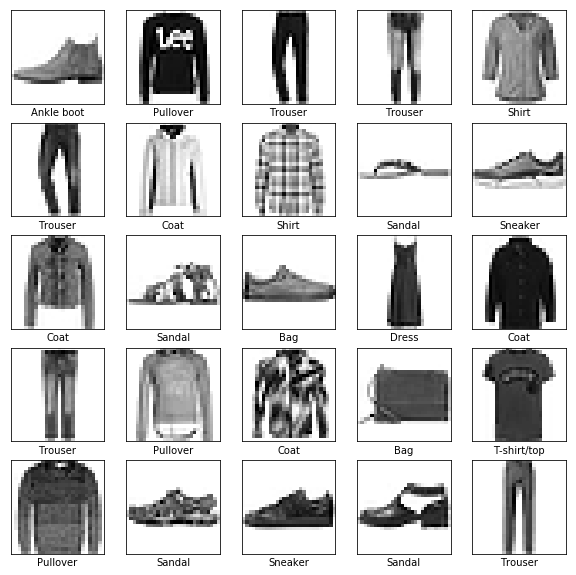

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred[i]])
plt.show()

In [62]:
f = open('testY.pickle','wb')
pickle.dump(pred,f)